<table style='border: none' align='left'>
   <tr style='border: none'>
      <th style='border: none'><font face='verdana' size='5' color='black'><b>Use XGBoost to classify tumors (Binary Classification Model Evaluation)</b></th>
      <th style='border: none'><img src='https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true' alt='Watson Machine Learning icon' height='40' width='40'></th>
   </tr>
   <tr style='border: none'>
       <th style='border: none'><img src='https://raw.githubusercontent.com/pmservice/wml-sample-notebooks/master/images/cancer_banner-06.png' alt='Icon' width='1000'> </th>
   </tr>
</table>

This notebook demonstates how to obtain data, build a predictive model, score the model, and evaluate the model. Especially, this notebook focuses more on `evaluating` the model with various `metrics`.

You will use a publicly available data set, the Breast Cancer Wisconsin (Diagnostic) data set, to train an XGBoost Model to classify breast cancer tumors (as benign or malign.) There are 569 data points in the Breast Cancer Wisconsin (Diagnostic) data set, and each data point has predictors such as radius, texture, perimeter, and area. XGBoost stands for “E**x**treme **G**radient **Boost**ing”.

The XGBoost classifier makes its predictions based on the majority vote from a collection of models which are a set of classification trees. It uses the combination of weak learners to create a single strong learner. It is a sequential training process where new learners focus on the misclassified examples of previous learners.

The notebook uses `scikit-learn 0.20`, `xgboost 0.82`, and `watson-machine-learning-client`.

Some familiarity with Python is helpful. This notebook is compatible with Python 3.6.


## Learning goals

You will learn how to:

-  Load data
-  Explore data
-  Prepare data for training and evaluation
-  Create an XGBoost machine learning model
-  Train and evaluate the model
-  Use cross-validation to optimize model's hyperparameters
-  Persist the model in the Watson Machine Learning repository
-  Deploy the model for online scoring
-  Score test data


## Contents

This notebook contains the following parts:

1.	[Set up the environment](#setup)
2.	[Load and explore the data](#load)
3.	[Create an XGBoost model](#model)
4.	[Persist the model](#persistence)
5.	[Deploy and score the model in the Watson Machine Learning (WML) repository](#scoring)
6.  [Download the model from the Watson Machine Learning (WML) repository](#download)
7.  [Model evaluation](#eval)
8.	[Summary and next steps](#summary)

<a id='load'></a>
## 1. Load and explore the data

In this section, you will load the data into a pandas dataframe and perform an exploratory data analysis (EDA).

The `breast cancer wisconsin data set` is included in `scikit-learn`, hence, only importing the `dataset` module is required.

To load the data into a pandas dataframe, use `pandas` to read the data.

**Note**: First, you need to install the required packages. You can do this by running the following code. Run it only once.<BR><BR>

<div class="alert alert-block alert-warning">
To simply hide the output of pip install instead, use <tt>-q</tt> after <tt>!pip install</tt>.
</div>

In [1]:
!pip install -q --upgrade pip
!pip install -q scikit-learn==0.20.3

Import the `load_breast_cancer` module in order to load the `breast cancer wisconsin data set`.

In [2]:
from sklearn.datasets import load_breast_cancer

wisconsin_data = load_breast_cancer()

Load the `breast cancer wisconsin data set` into a `pandas` DataFrame and add the target column - `diagnosis`. Check the first `5` data points (rows) of the data set.

In [3]:
from pandas import DataFrame

df = DataFrame(wisconsin_data.data, columns= wisconsin_data.feature_names)
df['diagnosis'] = wisconsin_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Run the code in the next cell to view the predictor names and data types.

You can see that the data set has 569 data points and 31 predictors.

In [4]:
# Information about the data set, predictor names, and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
# Information about values in the numerical columns.
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


You can see the distribution of the target values/labels by running the following code.

In [6]:
# Distribution of target values/labels.
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Check if there are missing values.

In [7]:
# Check for NANs.
df.isnull().sum().sum()

0

The data set has no missing values.

In order to make accurate predictions, you need to select the significant predictors by choosing the features that most affect the output, *diagnosis*.

In [8]:
# Pairwise correlation of numerical columns
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

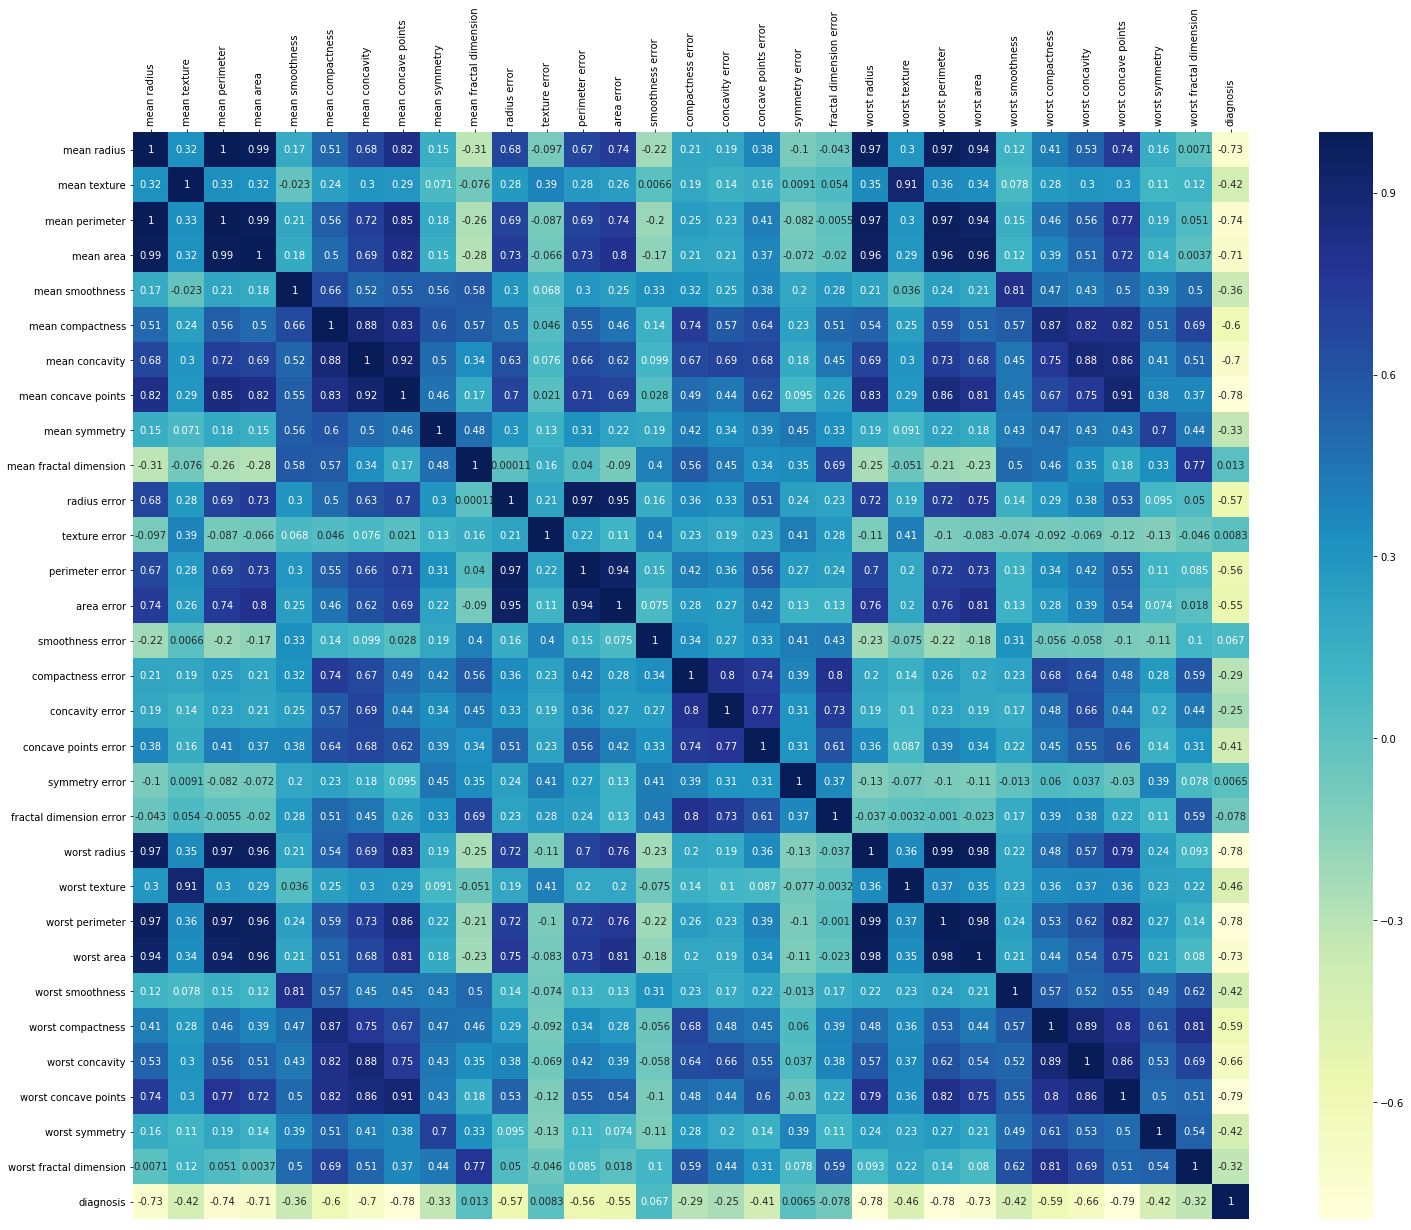

In [10]:
# Plot a correlation heatmap.
plt.subplots(figsize=(25,20))
hm1 = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=90)
hm1.xaxis.set_ticks_position('top')

This correlation heatmap helps with feature selection because the gradient shows the correlation between the columns of the dataframe. In order to select only the *significant* predictors, you must eliminate features that are highly correlated with each other **(ex: 0.95)**.

With respect to predicting the labels, the most significant predictors can be found by plotting boxplots of the numerical values against the labels. The features with boxplots that show the most variance should be chosen as the predictors for your model.

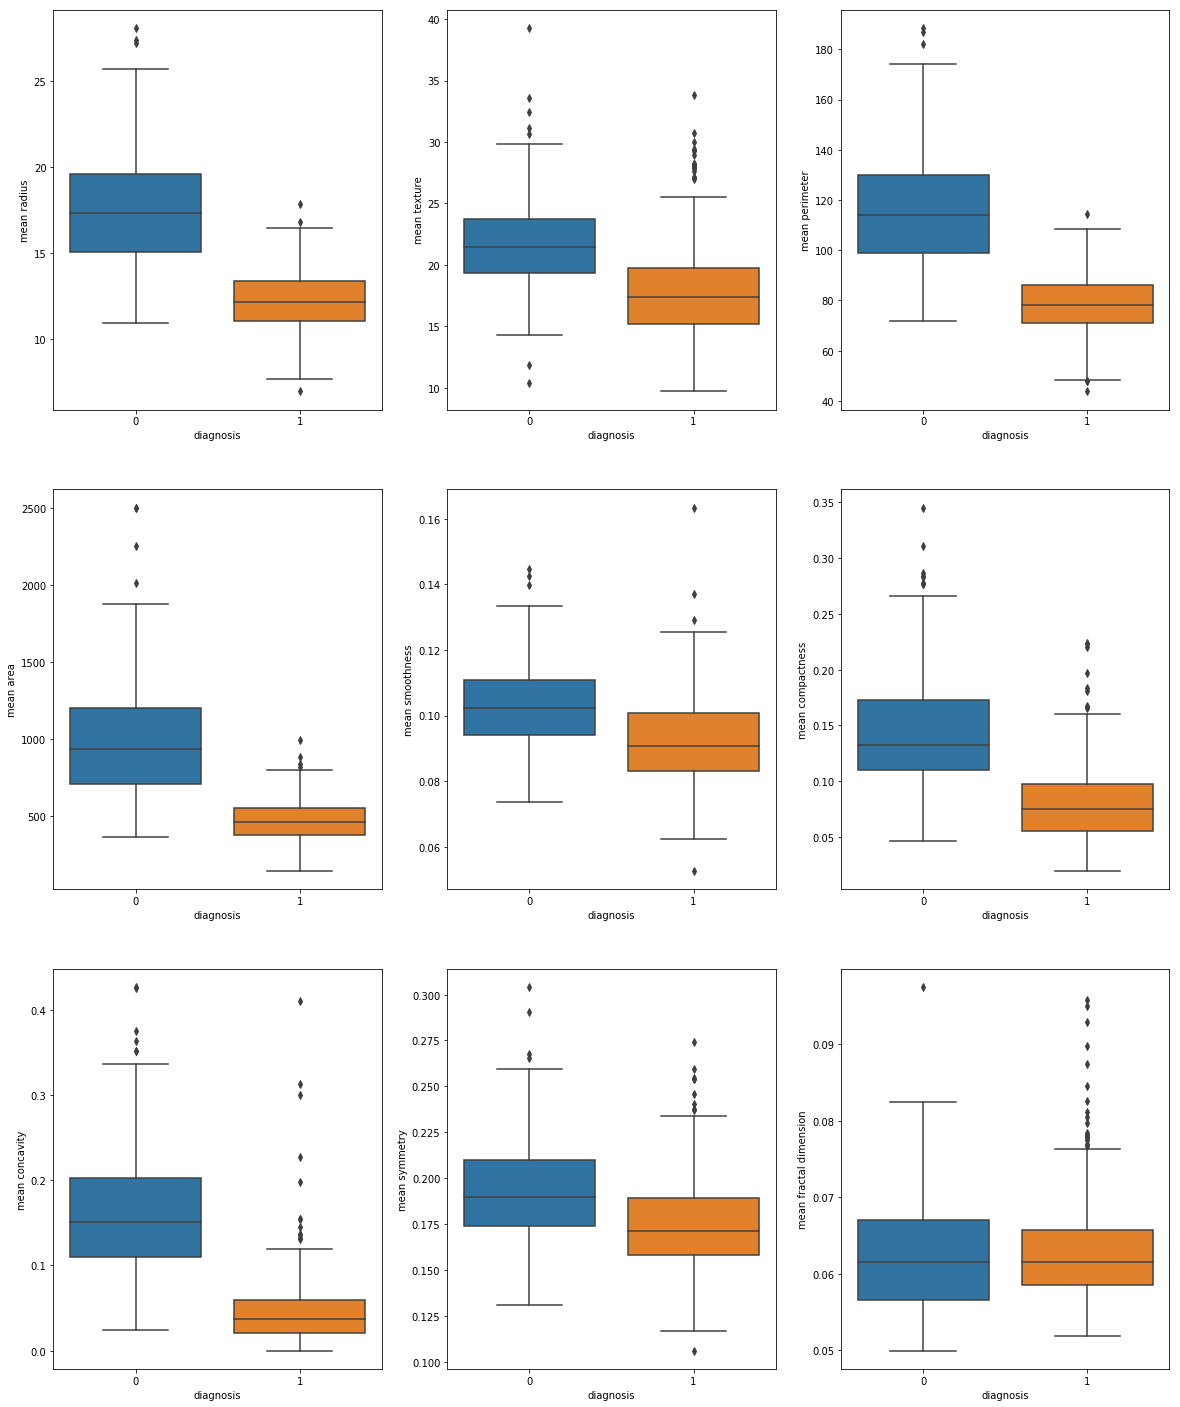

In [11]:
# Plot boxplots of numerical columns.
cont_list = [
    'mean radius', 'mean texture', 'mean perimeter',
    'mean area', 'mean smoothness', 'mean compactness',
    'mean concavity', 'mean symmetry', 'mean fractal dimension'
]
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(cont_list)):
    sns.boxplot(x = 'diagnosis', y = cont_list[i], data=df, ax=ax[i])

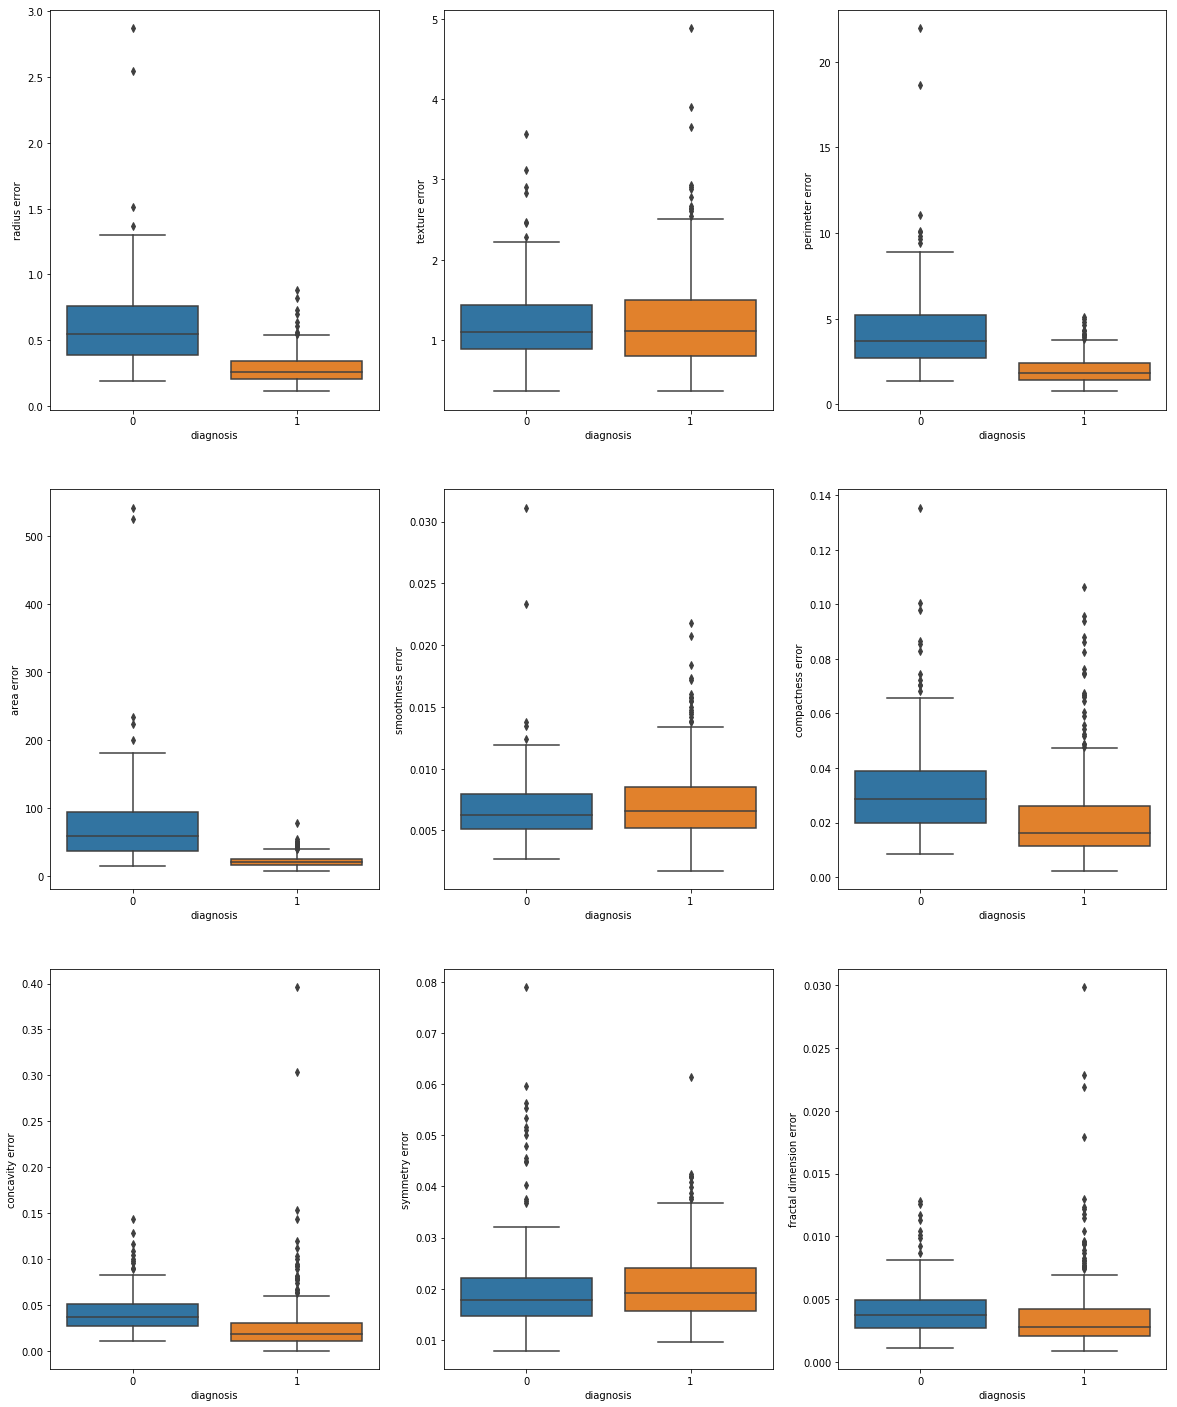

In [12]:
# Plot boxplots of numerical columns.
cont_list2 = [
    'radius error', 'texture error', 'perimeter error',
    'area error', 'smoothness error', 'compactness error',
    'concavity error', 'symmetry error', 'fractal dimension error'
]
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(cont_list2)):
    sns.boxplot(x = 'diagnosis', y = cont_list2[i], data=df, ax=ax[i])

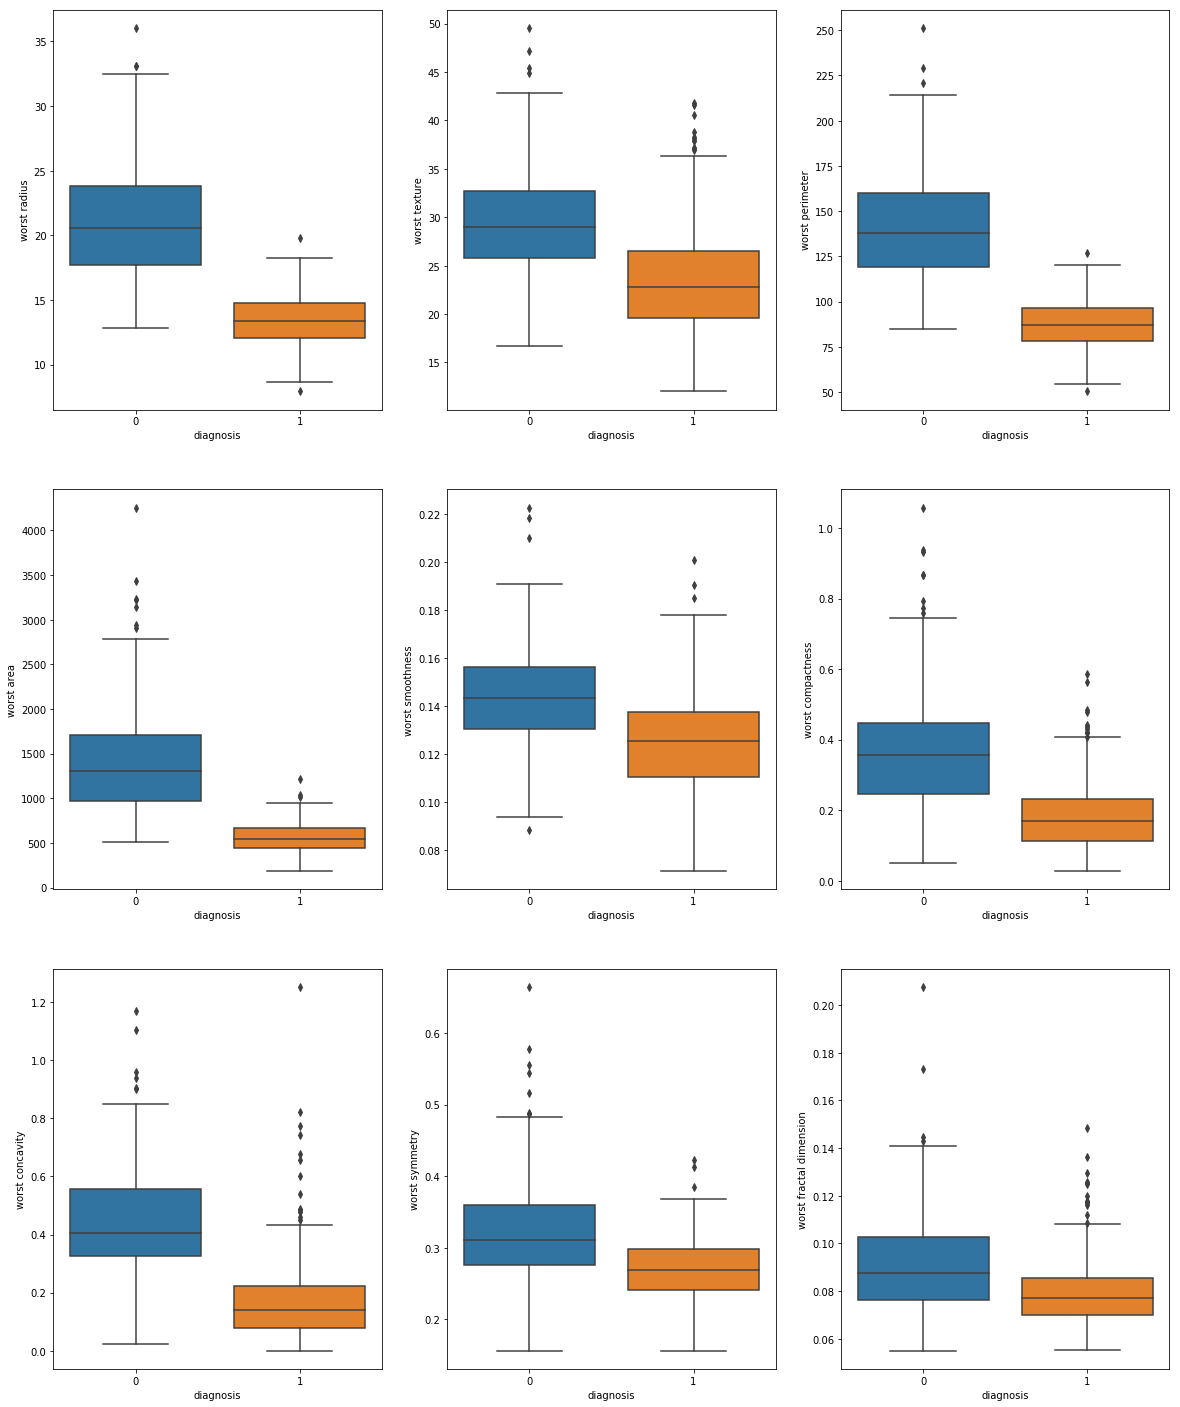

In [13]:
# Plot boxplots of numerical columns.
cont_list3 = [
    'worst radius', 'worst texture', 'worst perimeter',
    'worst area', 'worst smoothness', 'worst compactness',
    'worst concavity', 'worst symmetry', 'worst fractal dimension'
]
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(cont_list3)):
    sns.boxplot(x = 'diagnosis', y = cont_list3[i], data=df, ax=ax[i])

Here are boxplots of the most significant features:

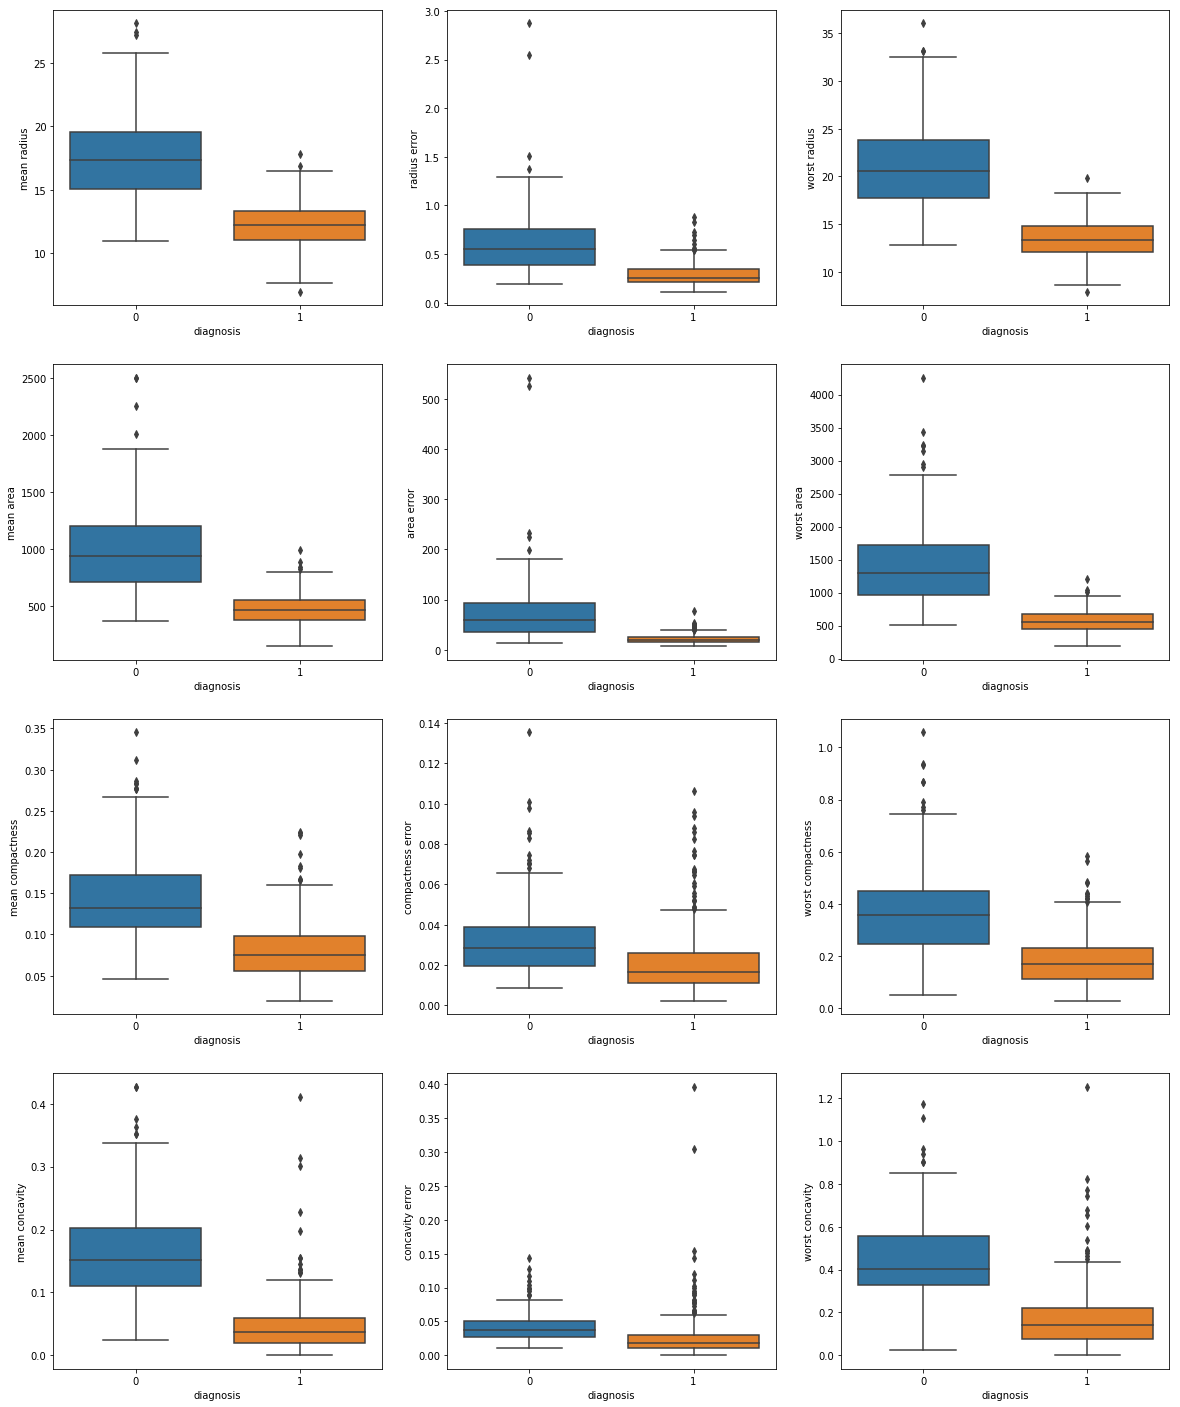

In [14]:
# Compare boxplots of significant numerical columns.
cont_list4 = [
    'mean radius', 'radius error', 'worst radius',
    'mean area', 'area error', 'worst area', 'mean compactness',
    'compactness error', 'worst compactness', 'mean concavity',
    'concavity error', 'worst concavity'
]
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(cont_list4)):
    sns.boxplot(x = 'diagnosis', y = cont_list4[i], data=df, ax=ax[i])

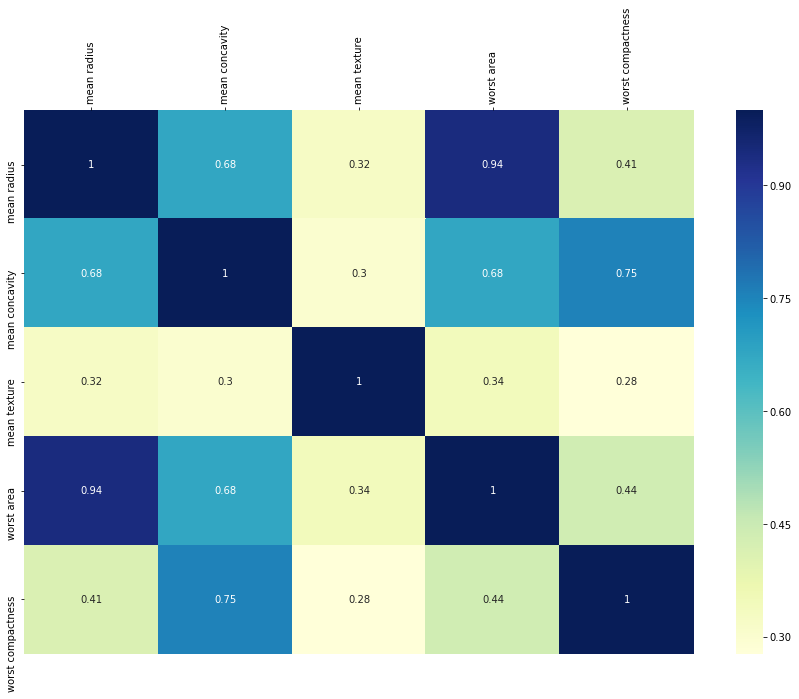

In [15]:
cont_list_f = ['mean radius', 'mean concavity', 'mean texture', 'worst area', 'worst compactness']
plt.subplots(figsize=(15,10))
hm2 = sns.heatmap(df[cont_list_f].corr(), annot=True, cmap='YlGnBu')
hm2.set_xticklabels(hm2.get_xticklabels(), rotation=90)
hm2.xaxis.set_ticks_position('top')

By plotting the boxplots of each numerical column against the diagnosis type, we have picked out the significant features/predictors. More variation in the boxplot implies higher significance. We also eliminate features that are highly correlated. Therefore we can choose *mean radius, mean concavity, mean texture, worst area, worst compactness* as the predictors for our model.

<a id='model'></a>
## 3. Create an XGBoost model

In this section, you will learn how to train and test an XGBoost model.

- [3.1 Split data](#prepare)
- [3.2 Create an XGBoost model](#create)

### 3.1 Split data<a id='prepare'></a>

You will pass the data with the selected significant predictors to build the model. You will use the `diagnosis` column as your target variable.

In [16]:
# Choosing the significant predictors.

X = df.iloc[:, [0, 1, 6, 23, 25]]
X = X.values

# Changing the target variables to binary variables
y = df['diagnosis'].astype('category').cat.codes
y = y.values

Split the data set into: 
- Train data set
- Test data set

In [17]:
# Split the data set and create two data sets.
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=143)

In [18]:
# List the number of records in each data set.
print('Number of training records: {}'.format(len(X_train)))
print('Number of testing records : {}'.format(len(X_test)))

Number of training records: 369
Number of testing records : 200


The data has been successfully split into two data sets:
- The train data set which is the largest group will be used for training.
- The test data set will be used for model evaluation and is used to test the assumptions of the model.

### 3.2 Create an XGBoost model<a id='create'></a>

Install the required packages.<br><br>

<div class="alert-block alert-info"><br>Make sure <tt>xgboost</tt>'s version is 0.82.<br><br>
</div>

In [19]:
!pip install -q xgboost==0.82

     |████████████████████████████████| 114.0 MB 51 kB/s s eta 0:00:01/s eta 0:00:08


In [20]:
import xgboost
xgboost.__version__

'0.82'

In [21]:
# Import packages you need to create the XGBoost model.
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### 3.2.1 Create an XGBoost classifier

In this subsection, you will create an XGBoost classifier with default hyperparameters that you will call *xgb_model*. <br><br>

<div class="alert-block alert-info"><br>The following sections will show you how to improve this base model.<br><br>
</div>

In [22]:
# Create the XGB classifier - xgb_model.
xgb_model = XGBClassifier(n_estimators=100)

Display the default parameters for *xgb_model*.

In [23]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1, 'verbosity': 0}


Now, that your XGBoost classifier *xgb_model* is set up, you can train it by using the fit method. You will also evaluate *xgb_model* as the train and test data are being trained.

In [24]:
# Train and evaluate.
xgb_model.fit(X_train, y_train, eval_metric=['error'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-error:0.0271	validation_1-error:0.07
[1]	validation_0-error:0.0271	validation_1-error:0.07
[2]	validation_0-error:0.0271	validation_1-error:0.07
[3]	validation_0-error:0.0271	validation_1-error:0.07
[4]	validation_0-error:0.0271	validation_1-error:0.07
[5]	validation_0-error:0.0271	validation_1-error:0.07
[6]	validation_0-error:0.0271	validation_1-error:0.07
[7]	validation_0-error:0.0271	validation_1-error:0.07
[8]	validation_0-error:0.0271	validation_1-error:0.07
[9]	validation_0-error:0.0271	validation_1-error:0.07
[10]	validation_0-error:0.0271	validation_1-error:0.07
[11]	validation_0-error:0.0271	validation_1-error:0.07
[12]	validation_0-error:0.0271	validation_1-error:0.06
[13]	validation_0-error:0.0271	validation_1-error:0.065
[14]	validation_0-error:0.0271	validation_1-error:0.055
[15]	validation_0-error:0.01897	validation_1-error:0.05
[16]	validation_0-error:0.01897	validation_1-error:0.05
[17]	validation_0-error:0.01897	validation_1-error:0.05
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Plot the model performance evaluated during the training process to assess model overfitting.

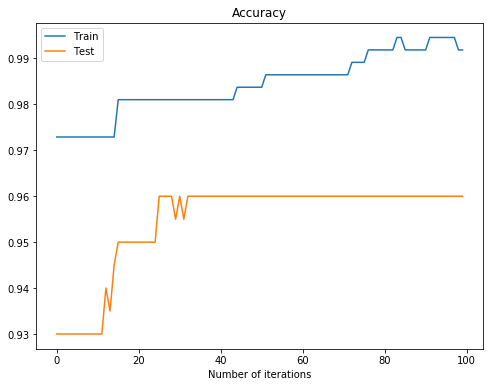

In [25]:
# Plot and display the performance evaluation
xgb_eval = xgb_model.evals_result()
eval_steps = range(len(xgb_eval['validation_0']['error']))

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations');

You can see that there is model overfitting, and there is no increase in model accuracy after about 40 iterations.

Select the trained model obtained after 40 iterations.

In [26]:
# Select trained model.
n_trees = 40
y_pred = xgb_model.predict(X_test, ntree_limit= n_trees)

In [27]:
# Check the accuracy of the trained model.
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 96.00%


**Note:** You will use the test data accuracy to compare the accuracy of the model with *default* parameters to the accuracy of the model with *tuned* parameters.

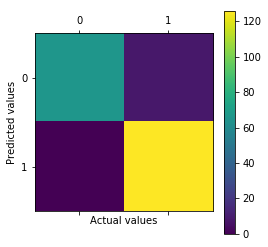

,0,1
0,66,8
1,0,126


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
DataFrame(cm)

This confusion matrix maps the predicted values against the actual values. Here, you can see that 126 benign tumors and 66 malignant tumors have been predicted correctly. However, 8 benign tumors have been incorrectly predicted as malignant. 

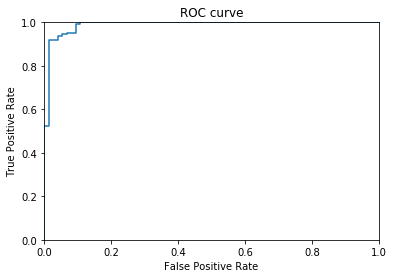

In [29]:
y_pred_prob = xgb_model.predict_proba(X_test)

# ROC-AUC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

This is the ROC-AUC curve - the area under the curve represents the accuracy of the predictions. You can see that the area under the curve is large, indicating that the predictions are highly accurate.

#### 3.2.2 Use grid search and cross-validation to tune the model 

You can use grid search and cross-validation to tune your model to achieve better accuracy.<br><br>

<div class="alert-block alert-info"><br>Grid search is used for this model as an example, but it is <b>not</b> recommended for small data sets such as this one, as it might lead to overfitting.<br><br></div>

XGBoost has an extensive catalog of hyperparameters which provides great flexibility to shape an algorithm’s desired behavior. Here you will optimize the model tuning which adds an L1 penalty (`reg_alpha`).

Use a 5-fold cross-validation because your training data set is small.

In the cell below, create the XGBoost pipeline and set up the hyperparameter grid for the grid search.

In [30]:
# Create XGBoost pipeline, set up parameter grid.
xgb_model_gs = XGBClassifier()
parameters = {'reg_alpha': [0.0, 1.0, 2.0], 'reg_lambda': [0.0, 1.0, 2.0], 'n_estimators': [n_trees], 'seed': [1337]}

Use ``GridSearchCV`` to search for the best hyperparameters from the specified values in the previous cell.

In [31]:
# Search for the best parameters.
clf = GridSearchCV(estimator = xgb_model_gs, param_grid = parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=1, refit=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'reg_alpha': [0.0, 1.0, 2.0], 'reg_lambda': [0.0, 1.0, 2.0], 'n_estimators': [40], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

From the grid scores, you can see performance results of all hyperparameter combinations including the best hyperparameter combination based on model performance.

In [32]:
# View the performance result.
for key in ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'params', 'rank_test_score']:
    print(key, ': ', clf.cv_results_[key])

mean_train_score :  [0.9878034  0.98441125 0.98237964 0.98237964 0.98238195 0.98170397
 0.98170168 0.98035033 0.98035033]
std_train_score :  [0.00460484 0.00553239 0.00335588 0.00452269 0.00255797 0.00347903
 0.00349147 0.00396154 0.00396154]
mean_test_score :  [0.95392954 0.95392954 0.95663957 0.95121951 0.95392954 0.94850949
 0.95121951 0.94850949 0.94850949]
std_test_score :  [0.02163273 0.02887374 0.02740164 0.02477434 0.02335837 0.03647359
 0.0324458  0.03647359 0.03647359]
params :  [{'n_estimators': 40, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 0.0, 'reg_lambda': 2.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 1337}, {'n_estimators': 40, 'reg_alpha': 2.0, 'reg_lambda': 0.0, 'seed': 1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Display the accuracy estimated using cross-validation and the hyperparameter values for the best model.

In [33]:
print('Best score: {:.2f}%'.format(clf.best_score_*100))
print('Best parameter set: {}'.format(clf.best_params_))

Best score: 95.66%
Best parameter set: {'n_estimators': 40, 'reg_alpha': 0.0, 'reg_lambda': 2.0, 'seed': 1337}


Display the accuracy of the best hypterparameter combination on the test set.

In [34]:
y_pred = clf.best_estimator_.predict(X_test, ntree_limit= n_trees)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100.0))

Accuracy: 96.00%


The test set's accuracy is about the same for both the tuned model and the trained model with default hyperparameter values, even though the tuned hyperparameters are different from the default parameters.

#### 3.2.3 Model with pipeline data preprocessing

In this subsection, you will learn how to use the XGBoost model within the scikit-learn pipeline. 

Let's start by importing the required modules.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=5)
xgb_model_pca = XGBClassifier(n_estimators=n_trees, reg_lambda=0.0, reg_alpha=1.0)
pipeline = Pipeline(steps=[('pca', pca), ('xgb', xgb_model_pca)])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth...    reg_alpha=1.0, reg_lambda=0.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

Now, you are ready to evaluate the accuracy of the model trained on the reduced set of features.

In [38]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100.0))

Accuracy: 94.50%


You can see that this model has an accuracy similar to the model trained using default hyperparameters.

Let's see how you can save the XGBoost pipeline using the WML service instance and deploy it for online scoring.

<a id='persistence'></a>
## 4. Persist the model

In this section, you will learn how to use the `watson-machine-learning-client` package to store your XGBoost model in the WML repository.

<div class="alert-block alert-info"><br>The <tt>watson-machine-learning-client</tt> documentation can be found <a href="https://wml-api-pyclient-dev.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.<br><br>
</div>

In [39]:
# Remove current wml package files.
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [40]:
!pip install --upgrade watson-machine-learning-client

     |████████████████████████████████| 536 kB 24.3 MB/s eta 0:00:01
  Attempting uninstall: watson-machine-learning-client
    Found existing installation: watson-machine-learning-client 1.0.376
    Uninstalling watson-machine-learning-client-1.0.376:
      Successfully uninstalled watson-machine-learning-client-1.0.376


Import the `watson-machine-learning-client` module and authenticate the service instance.

In [41]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

**Authenticate the Python client on the IBM Cloud.**<br><br>

<div class="alert-block alert-info"><br>To find your authentication information (your credentials) follow the steps provided here in the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_current/wsj/analyze-data/ml-authentication-local.html" target="_blank" rel="noopener no referrer">Documentation.</a><br><br></div>

**Action**: Enter your credentials in the following cell.

In [42]:
wml_credentials={
    'url': 'https://ibm-watson-ml.mybluemix.net',
    'access_key': '****',
    'username': '****',
    'password': '****',
    'instance_id': '****'
}

In [44]:
client = WatsonMachineLearningAPIClient(wml_credentials)

### 4.1 Save the XGBoost model in the WML Repository

Save the model artifact as *XGBoost model for breast cancer* to your WML instance.

Create the model metadata to store in the repository.

In [45]:
# Model Metadata.
meta_props = {
    client.repository.ModelMetaNames.NAME: 'XGBoost model for breast cancer'
}

You need the model uid to create the deployment. You can extract the model uid from the saved model details and use it in the next section to create the deployment.

In [46]:
# Create the model artifact.
model_artifact = client.repository.store_model(clf.best_estimator_, meta_props)
model_uid = client.repository.get_model_uid(model_artifact)
print('Model UID = {}'.format(model_uid))

Model UID = 700c757d-aa02-44fc-b6e6-5ce95a0f92ca


Obtain and print the saved model metadata.

In [47]:
# Details about the model.
model_details = client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'deployments': {'count': 0,
                            'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/700c757d-aa02-44fc-b6e6-5ce95a0f92ca/deployments'},
            'evaluation_metrics_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/700c757d-aa02-44fc-b6e6-5ce95a0f92ca/evaluation_metrics',
            'feedback_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/b4b6c696-172c-4164-8049-c0b621dbf3c9/published_models/700c757d-aa02-44fc-b6e6-5ce95a0f92ca/feedback',
            'latest_version': {'created_at': '2020-03-26T22:47:31.257Z',
                               'guid': '5d9f06b3-776c-4aa9-b877-5798d11d16af',
                               'url': 'https://us-south.ml.cloud.ibm.com/v3/ml_assets/models/700c757d-aa02-44fc-b6e6-5ce95a0f92ca/versions/5d9f06b3-776c-4aa9-b877-5798d11d16af'},
            'learning_configuration_url': 'https://u

# 5. Deploy the model to the Watson Machine Learning (WML) repository <a id="scoring"></a>


In this section, you will learn how to create online scoring and score a new data record in the WML repository.

You can list all stored models using the  `list_models` method.

### 5.1 Create a model deployment

Now, you can create a deployment, *Predict breast cancer*.

In [48]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Predict breast cancer')



#######################################################################################

Synchronous deployment creation for uid: '700c757d-aa02-44fc-b6e6-5ce95a0f92ca' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS....
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9cf51c31-9591-4598-873e-42e2ad2e15ff'
------------------------------------------------------------------------------------------------




Obtain the list of all deployments.

The *Predict breast cancer* model has been successfully deployed.

In [49]:
# Deployment UID.
deployment_uid = client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 9cf51c31-9591-4598-873e-42e2ad2e15ff


## 6. Download the model from the Watson Machine Learning (WML) repository <a id="download"></a>

In this section, you will learn how to download the saved model from the Watson Machine Learning (WML) repository to your local file system.

Import required modules.

In [50]:
from os import remove, getcwd, rename
from os.path import exists, join

**Action**: Enter the desired name of the model file - `model_file_name` - in the following cell. Otherwise, the default name would be `downloaded_artifact.tar.gz`.

In [51]:
# model_file_name = 'YOUR_MODEL_FILE_NAME'
model_file_name = 'xgboost_best_model.tar.gz'

if exists(model_file_name):
    try:
        remove(model_file_name)
    except:
        print('Error while deleting existing model file - {}'.format(model_file_name))

client.repository.download(model_uid, model_file_name)

Successfully saved artifact to file: 'xgboost_best_model.tar.gz'


'/home/dsxuser/work/xgboost_best_model.tar.gz'

Decompress the `xgboost_best_model.tar.gz` file.

In [52]:
!tar xvf xgboost_best_model.tar.gz

./
./scikit_model.pkl


Rename the model file - `scikit_model.pkl` - to `best_breast_cancer_model.pkl`.

In [53]:
path = getcwd()
new_model_name = 'best_breast_cancer_model.pkl'
new_path = join(path, new_model_name)
rename(join(path, 'scikit_model.pkl'), new_model_name)

Load the downloaded model file.

In [54]:
from sklearn.externals import joblib

bc_model = joblib.load(new_path)

## 7. Model evaluation <a id="eval"></a>

The following are the binary classification model evaluation metrics that will be covered in this section.
- Accuracy
- Classification report
- Cohen's Kappa score
- Confusion matrix
- Hamming loss
- Matthews correlation coefficient
- Precision-recall score
- Average precision score
- Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)

<div class="alert-block alert-info"><br>Details of all <tt>scikit-learn</tt> evaluation metrics above can be found <a href="https://scikit-learn.org/0.20/modules/model_evaluation.html" target="_blank" rel="noopener no referrer">here</a>.<br><br>
</div>

Import required modules.

In [76]:
from sklearn.metrics import (
    auc, average_precision_score, brier_score_loss, classification_report, cohen_kappa_score, confusion_matrix, hamming_loss,
    matthews_corrcoef, precision_recall_curve, roc_auc_score, roc_curve, 
)

`y_pred` has the predicted labels.

In [56]:
y_pred = bc_model.predict(X_test, ntree_limit=n_trees)

### 7.1 Accurary

`accuracy_score` computes the accuracy - the `fraction` of correct predictions.

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100.0))

Accuracy: 96.00%


If the `normalize` argument is set to `False`, `accuracy_score` computes the accuracy as the `count` of correct predictions.

In [58]:
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy (count of correct predictions): {}'.format(accuracy))

Accuracy (count of correct predictions): 192


### 7.2 Classification report

The `classification_report` function builds a text report showing the main classification metrics - `precision`, `recall`, and `f1 score`.

In [59]:
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       False       1.00      0.89      0.94        74
        True       0.94      1.00      0.97       126

   micro avg       0.96      0.96      0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



### 7.3 Cohen's Kappa score

The `Cohen's Kappa` score is intended to compare labelings by different human annotators, not a classifier versus a ground truth.

The `Cohen's Kappa` score is a number between ${-1}$ and ${1}$. Score ${\geq 0.8}$ is generally considered good agreement while score ${\geq 0}$ means no agreement (practically random labels).

In [60]:
cohen_kappa_score(y_test, y_pred)

0.9122422114962703

### 7.4 Confusion matrix

The `confusion_matrix` function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true label.

<div class="alert alert-block alert-warning">
    The <tt>plot_confusion_matrix</tt> function in the following cell is included in <tt>scikit-learn</tt> starting version <tt>0.22</tt>. <br />
    If you are using <tt>scikit-learn</tt> later than 0.21, just import <tt>plot_confusion_matrix</tt>. <br />
    <br />
    <tt>from sklearn.metrics import plot_confusion_matrix</tt>
</div>

In [61]:
from pandas import DataFrame
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

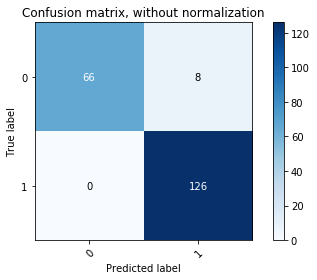

In [62]:
plot_confusion_matrix(y_test, y_pred, [0, 1]);

### 7.5 Hamming loss

The `hamming_loss` function computes the average `Hamming loss` or `Hamming distance` between two sets of samples.

In [63]:
hamming_loss(y_test, y_pred)

0.04

### 7.6 Matthews correlation coefficient

The `matthews_corrcoef` function computes the `Matthew’s correlation coefficient (MCC)` for `binary classes`.

According to <a href="https://scikit-learn.org/0.20/modules/model_evaluation.html" target="_blank" rel="noopener no referrer">`Wikipedia`</a>, the `Matthews correlation coefficient` is used in machine learning as a measure of the quality of `binary (two-class) classifications`. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between ${-1}$ and ${+1}$. A coefficient of ${+1}$ represents a perfect prediction, ${0}$ an average random prediction and ${-1}$ an inverse prediction. The statistic is also known as the `phi coefficient`.

In [64]:
matthews_corrcoef(y_test, y_pred)

0.915775417208836

### 7.7 Precision-recall score

The `precision_recall_curve` computes a precision-recall curve from the ground truth label and a score given by the classifier by varying a decision threshold.

<div class="alert alert-block alert-warning">
    The <tt>plot_precision_recall_curve</tt> function in the following cell is included in <tt>scikit-learn</tt> starting version <tt>0.22</tt>. <br />
    If you are using <tt>scikit-learn</tt> later than 0.21, just import <tt>plot_precision_recall_curve</tt> like the following. <br />
    <br />
    <tt>from sklearn.metrics import plot_precision_recall_curve</tt>
    <br />
    <br />
    <tt>_check_classifer_response_method</tt>, <tt>is_classifier</tt>, and <tt>PrecisionRecallDisplay</tt> are supporting functions and class, respectively, to implement the <tt>plot_precision_recall_curve</tt> function.<br /><br />
    The above functions and class are modified in order to make the <tt>plot_precision_recall_curve</tt> function run in this notebook.
</div>

In [65]:
def _check_classifer_response_method(estimator, response_method):
    '''Return prediction method from the response_method

    Parameters
    ----------
    estimator: object
        Classifier to check

    response_method: {'auto', 'predict_proba', 'decision_function'}
        Specifies whether to use :term:`predict_proba` or
        :term:`decision_function` as the target response. If set to 'auto',
        :term:`predict_proba` is tried first and if it does not exist
        :term:`decision_function` is tried next.

    Returns
    -------
    prediction_method: callable
        prediction method of estimator
    '''

    if response_method not in ('predict_proba', 'decision_function', 'auto'):
        raise ValueError('response_method must be \'predict_proba\', '
                         '\'decision_function\' or \'auto\'')

    error_msg = 'response method {} is not defined in {}'
    if response_method != 'auto':
        prediction_method = getattr(estimator, response_method, None)
        if prediction_method is None:
            raise ValueError(error_msg.format(response_method,
                                              estimator.__class__.__name__))
    else:
        predict_proba = getattr(estimator, 'predict_proba', None)
        decision_function = getattr(estimator, 'decision_function', None)
        prediction_method = predict_proba or decision_function
        if prediction_method is None:
            raise ValueError(error_msg.format(
                'decision_function or predict_proba',
                estimator.__class__.__name__))

    return prediction_method

In [66]:
def is_classifier(estimator):
    '''Return True if the given estimator is (probably) a classifier.
    Parameters
    ----------
    estimator : object
        Estimator object to test.
    Returns
    -------
    out : bool
        True if estimator is a classifier and False otherwise.
    '''
    return getattr(estimator, '_estimator_type', None) == 'classifier'

In [67]:
class PrecisionRecallDisplay:
    '''Precision Recall visualization.
    It is recommend to use :func:`~sklearn.metrics.plot_precision_recall_curve`
    to create a visualizer. All parameters are stored as attributes.
    Read more in the :ref:`User Guide <visualizations>`.
    Parameters
    -----------
    precision : ndarray
        Precision values.
    recall : ndarray
        Recall values.
    average_precision : float
        Average precision.
    estimator_name : str
        Name of estimator.
    Attributes
    ----------
    line_ : matplotlib Artist
        Precision recall curve.
    ax_ : matplotlib Axes
        Axes with precision recall curve.
    figure_ : matplotlib Figure
        Figure containing the curve.
    '''

    def __init__(self, precision, recall, average_precision, estimator_name):
        self.precision = precision
        self.recall = recall
        self.average_precision = average_precision
        self.estimator_name = estimator_name

    def plot(self, ax=None, name=None, **kwargs):
        '''Plot visualization.
        Extra keyword arguments will be passed to matplotlib's `plot`.
        Parameters
        ----------
        ax : Matplotlib Axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        name : str, default=None
            Name of precision recall curve for labeling. If `None`, use the
            name of the estimator.
        **kwargs : dict
            Keyword arguments to be passed to matplotlib's `plot`.
        Returns
        -------
        display : :class:`~sklearn.metrics.PrecisionRecallDisplay`
            Object that stores computed values.
        '''

        import matplotlib.pyplot as plt

        if ax is None:
            fig, ax = plt.subplots()

        name = self.estimator_name if name is None else name

        line_kwargs = {
            'label': '{} (AP = {:0.2f})'.format(name,
                                                self.average_precision),
            'drawstyle': 'steps-post'
        }
        line_kwargs.update(**kwargs)

        self.line_, = ax.plot(self.recall, self.precision, **line_kwargs)
        ax.set(xlabel='Recall', ylabel='Precision')
        ax.legend(loc='lower left')

        self.ax_ = ax
        self.figure_ = ax.figure
        return self


In [68]:
def plot_precision_recall_curve(estimator, X, y,
                                sample_weight=None, response_method='auto',
                                name=None, ax=None, **kwargs):
    '''Plot Precision Recall Curve for binary classifiers.
    Extra keyword arguments will be passed to matplotlib's `plot`.
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    Parameters
    ----------
    estimator : estimator instance
        Trained classifier.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Input values.
    y : array-like of shape (n_samples,)
        Binary target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    response_method : {'predict_proba', 'decision_function', 'auto'}, \
                      default='auto'
        Specifies whether to use :term:`predict_proba` or
        :term:`decision_function` as the target response. If set to 'auto',
        :term:`predict_proba` is tried first and if it does not exist
        :term:`decision_function` is tried next.
    name : str, default=None
        Name for labeling curve. If `None`, the name of the
        estimator is used.
    ax : matplotlib axes, default=None
        Axes object to plot on. If `None`, a new figure and axes is created.
    **kwargs : dict
        Keyword arguments to be passed to matplotlib's `plot`.
    Returns
    -------
    display : :class:`~sklearn.metrics.PrecisionRecallDisplay`
        Object that stores computed values.
    '''

    classification_error = ('{} should be a binary classifer'.format(
        estimator.__class__.__name__))
    if not is_classifier(estimator):
        raise ValueError(classification_error)

    prediction_method = _check_classifer_response_method(estimator,
                                                         response_method)
    y_pred = prediction_method(X)

    if y_pred.ndim != 1:
        if y_pred.shape[1] != 2:
            raise ValueError(classification_error)
        else:
            y_pred = y_pred[:, 1]

    pos_label = estimator.classes_[1]
    precision, recall, _ = precision_recall_curve(y, y_pred,
                                                  pos_label=pos_label,
                                                  sample_weight=sample_weight)
    average_precision = average_precision_score(y, y_pred,
                                                pos_label=pos_label,
                                                sample_weight=sample_weight)
    viz = PrecisionRecallDisplay(precision, recall, average_precision,
                                 estimator.__class__.__name__)
    return viz.plot(ax=ax, name=name, **kwargs)

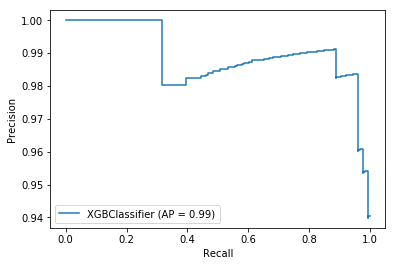

In [69]:
plot_precision_recall_curve(bc_model, X_test, y_test);

In [70]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

In [71]:
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Precision-Recall threshold: {}'.format(threshold))

Precision: [0.94029851 1.        ]
Recall: [1. 0.]
Precision-Recall threshold: [1]


### 7.8 Average precision score

The `average_precision_score` function computes the average precision (AP) from prediction scores. The value is between 0 and 1 and higher is better. The AP is defined as

${AP = \sum_{n} (R_{n} - R_{n-1})P_{n}}$

where ${P_{n}}$ and ${R_{n}}$ are the precision and recall at the ${n^{th}}$ threshold. With random predictions, the AP is the fraction of positive samples.

In [73]:
average_precision_score(y_test, y_pred)

0.9559825273778763

### 7.9 Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)

The Receiver Operating Characteristic (ROC) curve illustrates the performance of the binary classifier model graphically. Typically, the ROC curve features the `false positive rate (fpr)`, and `true positive rate (tpr)` on the `x` axis, and `y` axis, respectively. The `ideal` case is when `fpr` is `0` and the `tpr` is `1` and this point is located at the `top-left` corner of the `plot`. Usually, larger `Area Under the Curve (AUC)` is better.

The `roc_auc_score` function computes the area under the `Receiver Operating Characteristic (ROC)` curve, which is also denoted by `AUC` or `AUROC`.

In [75]:
roc_auc_score(y_test, y_pred)

0.9582797082797083

You can plot the `ROC` curve and `AUC` using the code in the following cells.

In [104]:
from numpy import hstack
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_copy = lb.fit_transform(y_test)
y_test_copy = hstack((y_test_copy, 1 - y_test_copy))
y_pred_copy = lb.fit_transform(y_pred)
y_pred_copy = hstack((y_pred_copy, 1 - y_pred_copy))

n_classes = y_test_copy.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_copy[:, i], y_pred_copy[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_copy.ravel(), y_pred_copy.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

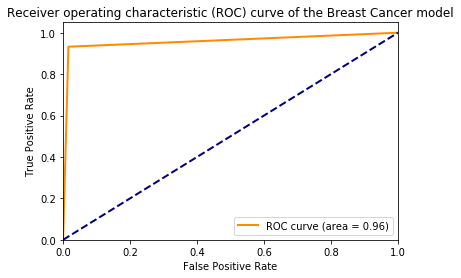

In [112]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve of the Breast Cancer model')
plt.legend(loc='lower right')
plt.show()

## 8. Summary and next steps <a id="summary"></a>

You have successfully completed this notebook! 

You learned how to use a machine learning algorithm called XGBoost as well as Watson Machine Learning to create and deploy a model. 

### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success">

<h4>IBM documentation</h4>
<ul>
 <li> <a href="https://wml-api-pyclient-dev.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
</ul>

<h4> IBM Samples</h4>
<ul>
 <li> <a href="https://dataplatform.cloud.ibm.com/gallery" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
</ul>

<h4> Others</h4>
<ul>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 <li> <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank" rel="noopener noreferrer">Pandas DataFrame</a></li>
 <li> <a href="https://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" rel="noopener noreferrer">Scikit-learn 0.20: Grid Search</a></li>
 <li> <a href="https://scikit-learn.org/0.20/modules/model_evaluation.html" target="_blank" rel="noopener no referrer">Scikit-learn 0.20: Model evaluation: quantifying the quality of predictions</a>
 <li> <a href="https://seaborn.pydata.org" target="_blank" rel="noopener noreferrer">Seaborn</a></li>
</ul>
 </div>

### Citation

Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

### Authors

**Wojciech Sobala** is a Data Scientist at IBM.  
**Ananya Kaushik** is a Data Scientist at IBM.  
**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who strives to make data science easy for everyone through Watson Studio.

Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style='background:#F5F7FA; height:110px; padding: 2em; font-size:14px;'>
<span style='font-size:18px;color:#152935;'>Love this notebook? </span>
<span style='font-size:15px;color:#152935;float:right;margin-right:40px;'>Don't have an account yet?</span><br>
<span style='color:#5A6872;'>Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style='border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;'><a href='https://ibm.co/wsnotebooks' target='_blank' style='color: #3d70b2;text-decoration: none;'>Sign Up</a></span><br>
</div>